<a href="https://colab.research.google.com/github/josooik/DeepLearning/blob/main/1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀 (Linear Regression)
>**목차**
1. 개념정리
2. 손실함수: 평균제곱오차 (Mean Squared Error)
3. 최적화: 경사하강법 (Gradient Descent) 
4. 실습1: 단순선형회귀분석(Simple Linear Regression Analysis)
5. 실습2: 다중선형회귀분석(Multiple Linear Regression Analysis)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---

</br>

###<center> < 가설 > </center>
###  <center>$f(x_i)=wx_i+b$</center>

</br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-f(x_i) )^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-wx_i-b)^2$</center>

### **구현**


In [ ]:
def hypothesis(x, w=1, b=0):
  return w * x + b

### **예제**

|공부시간|종합점수|
|------|---|
|1|1.1|
|2|1.2|
|3|2.2|
|4|3.1|
|5|3.7|

* 데이터 정의

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.1, 1.2, 2.3, 3.1, 3.7])

* 예측

In [ ]:
y_pred = hypothesis(x)
print(y_pred)

[1 2 3 4 5]


* 시각화

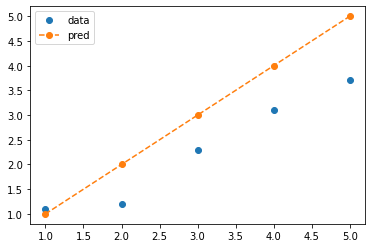

In [ ]:
plt.plot(x, y, marker='o', linestyle='')
plt.plot(x, y_pred, marker='o', linestyle='--')
plt.legend(["data", "pred"])
plt.show()

## 2. 손실함수: 평균제곱오차 (Mean Squred Error)
---

</br>

### <center>$ MSE = \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>

### <center>$=\sum_{i=1}^m(y_i-wx_i-b)^2$

### **구현**

In [ ]:
def MSE(y, y_predt):
  I = 0
  for yi, yi_pred in zip(y, y_pred):
    I += (yi - yi_pred)**2
  return I

def MSE(y, y_pred):
  return sum([(yi - yi_pred) ** 2 for yi, yi_pred in zip(y, y_pred)])


* 계산

In [ ]:
y, y_pred

error = MSE(y, y_pred)
print(error)

3.6399999999999997


### **Error 시각화**

*  W 값에 따른 Error 값 변화

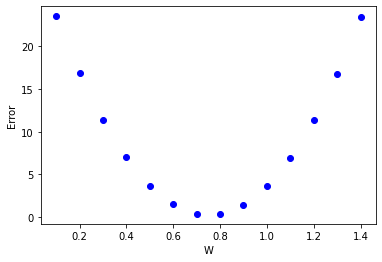

In [ ]:
W = np.arange(0.1, 1.5, 0.1)

for w in W:
  y_pred = hypothesis(x, w)
  error = MSE(y, y_pred)
  plt.plot(w, error, marker='o', color='b')

plt.xlabel("W")
plt.ylabel("Error")
plt.show()

## 3. 최적화: 경사하강법 ( Gradient Desent )
---
</br>

## <center>$w^* =  w-\alpha\frac{\theta }{\theta w}Cost(w) $</center>


<center> 기울기가 음수일 때: $\frac{\theta }{\theta w}Cost(w) < 0 \rightarrow w* = w+\alpha*(기울기)$</center>
<center>기울기가 음수이면 $w$는 지금보다 큰 값으로 업데이트</center>

</br>

<center> 기울기가 양수일 때: $\frac{\theta }{\theta w}Cost(w) > 0 \rightarrow w* = w-\alpha*(기울기)$</center>
<center>기울기가 양수이면 $w$는 지금보다 작은 값으로 업데이트</center>


### **구현**

In [ ]:
x, y

(array([1, 2, 3, 4, 5]), array([1.1, 1.2, 2.3, 3.1, 3.7]))

In [ ]:
# y_pred =f(x) = wx + b

# mse = (yi - (w * xi + b)) ** 2

def diff(xi, yi, w):
  return 2 * (xi ** 2) * w - 2 * xi * yi # mse의 미분값

def GD(xi, yi, w, alpha=0.01):
  return w - (alpha * diff(xi, yi, w))

### **학습**

In [ ]:
xi = x[0]
yi = y[0]

w_new = 1

for xi, yi in zip(x, y):
  w_new = GD(xi, yi, w_new)
  print(w_new)

1.002
0.96984
0.9332688
0.882622784
0.811311392


### **파라미터**: $\alpha$ 값에 따른 W 변화

In [ ]:
w_new = 1
print(w_new)

for xi, yi in zip(x, y):
  w_new = GD(xi, yi, w_new, alpha=0.1)
  print(w_new)

1
1.02
0.6839999999999999
0.8327999999999999
0.6478400000000003
1.1086399999999985


## 4. 실습1: 단순 선형 회귀 분석(Simple Linear Regression Analysis)
---

<br>

###  <center>$f(x_i)=wx_i+b$</center>



### **데이터**

|공부시간|종합점수|
|------|---|
|0|0|
|1|11|
|2|23|
|3|30|
|4|44|
|5|55|
|6|61|
|7|73|
|8|84|
|9|98|



* 데이터 정의

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([0, 11, 23, 30, 44, 55, 61, 73, 84, 98])

x.shape, y.shape

((10,), (10,))

* 시각화

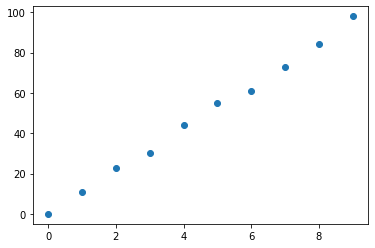

In [ ]:
plt.plot(x, y, linestyle='', marker='o')
plt.show()

### **모델 생성**

* 케라스를 이용한 모델 구현

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* 학습파라미터 확인

In [ ]:
print(model.get_weights())
print("W : ", model.get_weights()[0], "b : ", model.get_weights()[1])

[array([[0.33880436]], dtype=float32), array([0.], dtype=float32)]
W :  [[0.33880436]] b :  [0.]


* 학습파라미터 시각화

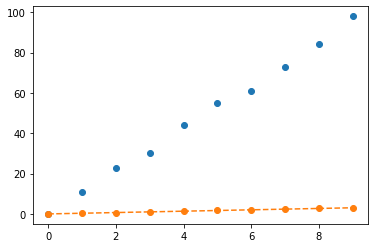

In [ ]:
y_pred = model.predict(x)

plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y_pred, linestyle='--', marker='o')
plt.show()

### **학습**

* 모델 컴파일

In [ ]:
model.compile(optimizer = optimizers.SGD(learning_rate=0.01),
              loss = 'mse',
              metrics=['mse'])

* 학습 진행

In [ ]:
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 297ms/step - loss: 3020.1238 - mse: 3020.1238
Epoch 2/10
1/1 [==============================] - 0s 15ms/step - loss: 524.5406 - mse: 524.5406
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 93.3925 - mse: 93.3925
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 18.9013 - mse: 18.9013
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 6.0273 - mse: 6.0273
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 3.7985 - mse: 3.7985
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 3.4089 - mse: 3.4089
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 3.3370 - mse: 3.3370
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 3.3201 - mse: 3.3201
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 3.3127 - mse: 3.3127


### **결과**

* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
print("W : ", model.get_weights()[0], "b : ", model.get_weights()[1])

[array([[10.383545]], dtype=float32), array([1.5259053], dtype=float32)]
W :  [[10.383545]] b :  [1.5259053]


* 시각화

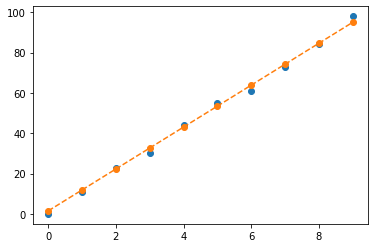

In [ ]:
y_pred = model.predict(x)

plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y_pred, linestyle='--', marker='o')
plt.show()

* 결과예측

In [ ]:
x= [10, 11]
model.predict(x)

array([[105.36135 ],
       [115.744896]], dtype=float32)

## 5. 실습2: 다중선형회귀 (Multiple Linear Regression Analysis)
---
<br>

###  <center>$f(\vec{x_i})=\vec{x}_iW+b$</center>

### **데이터**
|공부시간|집중도|수면시간|종합성적|
|------|---|---|---|
|0|1|9|0|
|1|1|8.5|11|
|2|2|8|23|
|3|4|8|30|
|4|3|7|44|
|5|5|7.5|55|
|6|6|7|61|
|7|6|6|73|
|8|7|7|84|
|9|6|6.5|98|



* 데이터 정의

In [ ]:
x = np.array([[0, 1, 9],
              [1, 1, 8.5],
              [2, 2, 8],
              [3, 4, 8],
              [4, 3, 7],
              [5, 5, 7.5],
              [6, 6, 7],
              [7, 6, 6],
              [8, 7, 7],
              [9, 6, 6.5]])

y = np.array([0, 11, 23, 30, 44, 55, 61, 73, 84, 98])

x.shape, y.shape

((10, 3), (10,))

### **모델 생성**

* 케라스를 이용한 모델 생성

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W : ", W, "b : ", b)

[array([[-0.2734087 ],
       [ 0.48091698],
       [ 1.1887006 ]], dtype=float32), array([0.], dtype=float32)]
W :  [[-0.2734087 ]
 [ 0.48091698]
 [ 1.1887006 ]] b :  [0.]


### **학습**

* 모델 컴파일

In [ ]:
model.compile(optimizer = optimizers.SGD(learning_rate=0.01),
              loss = 'mse',
              metrics=['mse'])

* 학습 진행

In [ ]:
model.fit(x, y, epochs = 300)

Epoch 1/300
1/1 [==============================] - 0s 285ms/step - loss: 2442.9717 - mse: 2442.9717
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 1990.8942 - mse: 1990.8942
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 1646.5573 - mse: 1646.5573
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 1378.1659 - mse: 1378.1659
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 1164.5619 - mse: 1164.5619
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 991.4567 - mse: 991.4567
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 849.0314 - mse: 849.0314
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 730.3969 - mse: 730.3969
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 630.6101 - mse: 630.6101
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 546.0367 - mse: 546.0367
Epoch 11/300
1/1 [=======

### **결과**

* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W : ", W, "b : ", b)

[array([[11.069854  ],
       [-0.6952591 ],
       [ 0.09167183]], dtype=float32), array([0.24641548], dtype=float32)]
W :  [[11.069854  ]
 [-0.6952591 ]
 [ 0.09167183]] b :  [0.24641548]


* 결과 예측

In [ ]:
sample = [[11, 4, 6]]
print(model.predict(sample))

[[119.783806]]
